In [91]:
import random
import graphviz 
import os
import numpy as np
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [92]:

def generate_bin_tree(n=4):
    # start with root node and no children
    tree = [[-1, -1]]
    free_edges = [(0, 0), (0, 1)]



    while len(tree) < n:
        e = random.choice(free_edges)  # select a free edge
        node, child = e
        assert tree[node][child] == -1  # make sure we made no mistake

        k = len(tree)  # index of new node
        tree.append([-1, -1])  # add new node

        tree[node][child] = k  # set new node as child of an old node
        free_edges.extend([(k, 0), (k, 1)])  # new node has two free edges

        free_edges.remove(e)  # edge is no longer free
    return tree


def render_bin_tree(tree): 
    rep ='digraph \n {'
    rep += 'node0[label=0]\n'
    for parent,children in enumerate(tree):
        rep += 'node'+str(parent)+'[label='+str(parent)+']\n'
        if children[0] == -1:
            rep += 'node'+str(parent)+'t0[label=Leaf'+str(parent)+'L,color="dodgerblue"]\n'
        else:
            rep += 'node'+str(children[0])+'[label='+str(children[0])+']\n'
        if children[1] == -1:
            rep += 'node'+str(parent)+'t1[label=Leaf'+str(parent)+'R,color="dodgerblue"]\n'
        else:
            rep += 'node'+str(children[1])+'[label='+str(children[1])+']\n'
            
    for parent,children in enumerate(tree) :
        if children[0] != -1:
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(children[0]) +'\n'
        else:      
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(parent) +'t0\n'


        if children[1] != -1:
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(children[1]) +'\n'

        else:      
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(parent) +'t1\n'

    rep+='}'

    graph = graphviz.Source(rep) 
    return graph



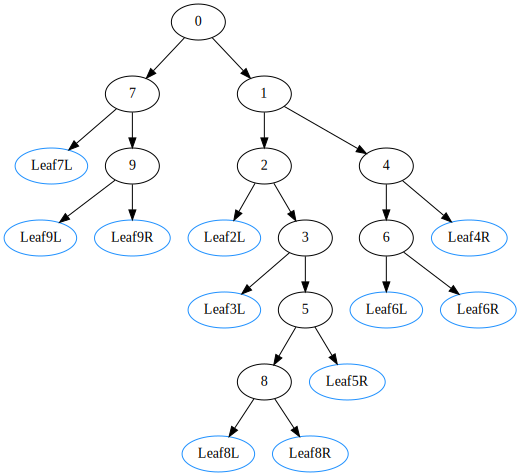

In [93]:
tree=generate_bin_tree(10)
render_bin_tree(tree)

In [94]:
cl=[]
def left_right(tree,node):
    if tree[node][0]==-1 & tree[node][1]==-1 :
#         print(' [leaf'+str(node)+'L] ')
#         print(' [leaf'+str(node)+'R] ')
        cl.append('leaf'+str(node)+'L')
        cl.append('leaf'+str(node)+'R')
        return
    else:
        
        
        if tree[node][0]==-1 :
            cl.append('leaf'+str(node)+'L')
            
        else: 
            left_right(tree,tree[node][0])

        if tree[node][1]==-1 :
            #         print(' [leaf'+str(node)+'R] ')
            cl.append('leaf'+str(node)+'R')

        else:
            left_right(tree,tree[node][1])
    
left_right(tree,0)    

In [95]:


ord= [0]*len(tree)
def order(tree,node,d):
    if node !=-1 and  tree[node][0]!=-1 :
        ord[tree[node][0]]=ord[node]-(1.0/d)
        order(tree,tree[node][0],d+1)
    if node !=-1 and tree[node][1]!=-1:
        ord[tree[node][1]]=ord[node]+(1.0/d)    
        order(tree,tree[node][1],d+1)
    return


order(tree,0,1)
print(ord)


[0, 1.0, 0.5, 0.8333333333333333, 1.5, 1.0833333333333333, 1.1666666666666667, -1.0, 0.8833333333333333, -0.5]


In [96]:

def split_var(v,s):
    splits=[]
    np.random.choice(range(s),s,replace=False)
    mi=0
    ma=s-v+1
    for k in range(v-1):     
        m=np.random.choice(range(mi+1,ma))
        splits.append([mi,m])
        mi=m
        ma+=1
    splits.append([mi,s])
    nodes=list(np.random.choice(range(s),s,replace=False))
    feat=[]
    for k in range(v):
        feat.append(nodes[splits[k][0]:splits[k][1]])
    return feat

splits=split_var(2,10)
values=[]
for nodes in splits:
    values.append(np.array([ord[node] for node in nodes]).argsort())
print(values)



[array([3, 1, 2, 0], dtype=int64), array([0, 2, 3, 1, 5, 4], dtype=int64)]


In [97]:
print(splits)
print(values)
def node_to_graph(n,values,splits):
    for i,s in enumerate(splits):
        for j,k in enumerate(s):
            if k==n:
                return i,values[i][j]
def leaf_to_class(l):
    for i,o in enumerate(cl):
        if o==l:
            if i%2==0:
                return "dodgerblue"
            else:
                return "tomato"


[[6, 2, 5, 9], [7, 8, 0, 3, 4, 1]]
[array([3, 1, 2, 0], dtype=int64), array([0, 2, 3, 1, 5, 4], dtype=int64)]


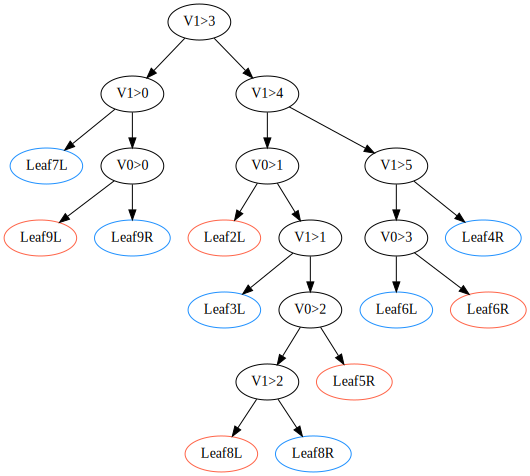

In [98]:
def render_decision_tree(tree): 
    rep ='digraph \n {'
    rep += 'node0[label=0]\n'
    for parent,children in enumerate(tree):
        rep += 'node'+str(parent)+'[label="V'+     str(node_to_graph(parent,values,splits)[0])+'>'+\
                                                str(node_to_graph(parent,values,splits)[1]) +'"]\n'
        if children[0] == -1:
            rep += 'node'+str(parent)+'t0[label=Leaf'+str(parent)+'L,color="'+\
            leaf_to_class("leaf%sL"% parent)+'"]\n'
        else:
            rep += 'node'+str(children[0])+'[label='+str(children[0])+']\n'
        if children[1] == -1:
            rep += 'node'+str(parent)+'t1[label=Leaf'+str(parent)+'R,color="'+\
            leaf_to_class("leaf%sR"% parent)+'"]\n'
        else:
            rep += 'node'+str(children[1])+'[label='+str(children[1])+']\n'
            
    for parent,children in enumerate(tree) :
        if children[0] != -1:
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(children[0]) +'\n'
        else:      
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(parent) +'t0\n'


        if children[1] != -1:
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(children[1]) +'\n'

        else:      
            rep+= 'node'+str(parent)+' -> ' + 'node'+str(parent) +'t1\n'

    rep+='}'

    graph = graphviz.Source(rep) 
    return graph
render_decision_tree(tree)

In [99]:
def sample(values, n):
   return [np.random.uniform(min(v)-1,max(v)+1 ,n) for v in values]

In [100]:
import matplotlib.pyplot as plt 
%matplotlib inline

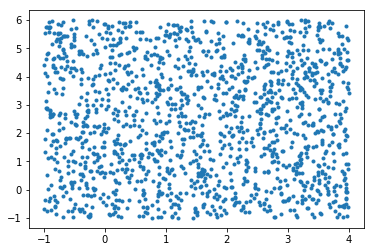

In [101]:
samp=sample(values,1500)
plt.plot(samp[0],samp[1],'.')
plt.show()

In [102]:
def classify(tree,node,values,sample):
    feature,value=node_to_graph(node,values,splits)
    if sample[feature]<value:
        if tree[node][0]==-1:
            
            return leaf_to_class("leaf"+str(node)+"L")
        
        return classify(tree,tree[node][0],values,sample)
    else:
        if tree[node][1]==-1:
            
            return leaf_to_class("leaf"+str(node)+"R")
        
        return classify(tree,tree[node][1],values,sample)
c=[]     
for s in np.array(samp).T:
        if classify(tree,0,values,s) == 'dodgerblue':
            c.append(1)
        else:
            c.append(0)

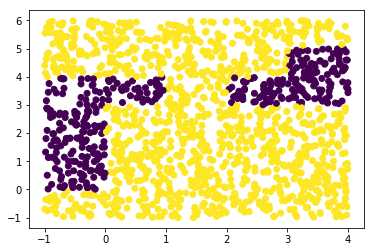

In [103]:
plt.scatter(samp[0],samp[1],c=c)
plt.show()